In [1]:
import pandas as pd
import torch

# Start by reading in the RSC weights
weights_df = pd.read_csv(
    '/data/road_surface_classifier/dataset_multiclass/class_weights.csv')
labels_lv_b = list(weights_df['class_name'])
labels_lv_a = ['paved', 'unpaved']
top_level_map = list(weights_df['top_level'])
class_weights = list(weights_df['weight'])

In [2]:
from rsc.train.rsc_hxe_loss import RSCHXELoss

# Construct hierarchical loss function
hxe_loss = RSCHXELoss(torch.IntTensor(top_level_map), torch.Tensor(class_weights))

In [3]:
df = pd.DataFrame()
df['Level B (Fine) Label'] = labels_lv_b
df['Level A (Coarse) Label'] = [labels_lv_a[e] for e in top_level_map]

df['Original Weight'] = class_weights
df['Level B Weight'] = hxe_loss.lv_b_w_a
df['Level A Weight'] = [hxe_loss.lv_a_w.numpy()[e] for e in top_level_map]

df


Level B (Fine) Label Level A (Coarse) Label  Original Weight  \
0              asphalt                  paved         0.912725   
1               bricks                  paved         2.637934   
2             concrete                  paved         0.456363   
3        paving_stones                  paved         1.849868   
4            compacted                unpaved         0.916575   
5                 dirt                unpaved         0.913273   
6               gravel                unpaved         0.913273   
7               ground                unpaved         1.951101   

   Level B Weight  Level A Weight  
0        0.959850        0.950904  
1        2.774133        0.950904  
2        0.479925        0.950904  
3        1.945379        0.950904  
4        0.869251        1.054442  
5        0.866120        1.054442  
6        0.866120        1.054442  
7        1.850363        1.054442

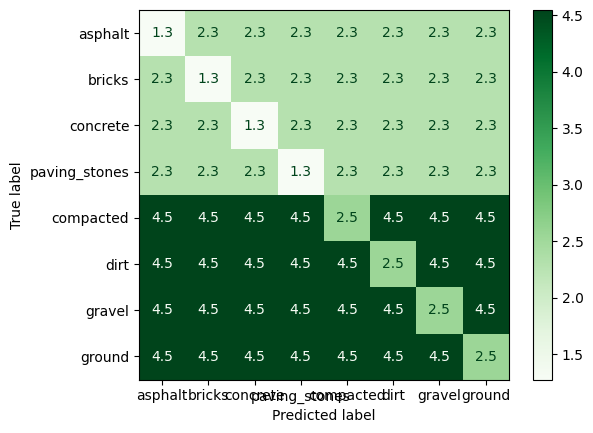

In [4]:
import numpy as np
import matplotlib.pyplot as plt

xe_loss = torch.nn.CrossEntropyLoss(torch.Tensor([1, 1, 1, 1, 2, 2, 2, 2]), reduction='none')

matrix = np.zeros((len(labels_lv_b), len(labels_lv_b)))
for i in range(len(labels_lv_b)):
    for j in range(len(labels_lv_b)):
        pred = torch.zeros((1, len(labels_lv_b)))
        pred[:, i] = 1
        true = torch.LongTensor([j])
        matrix[j, i] = xe_loss(pred, true).numpy()

import sklearn.metrics
disp = sklearn.metrics.ConfusionMatrixDisplay(matrix, display_labels=labels_lv_b)
disp.plot(cmap=plt.cm.Greens)

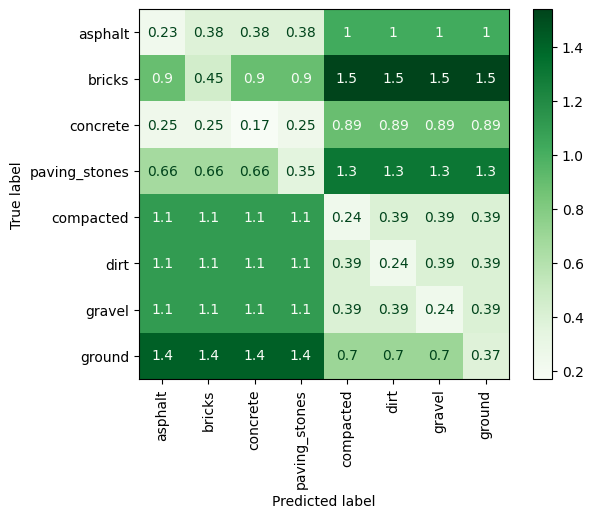

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from rsc.train.rsc_hxe_loss import RSCHXELoss

top_level_map = [0, 0, 0, 0, 1, 1, 1, 1]
hxe_loss = RSCHXELoss(torch.IntTensor(top_level_map), torch.Tensor(class_weights))

matrix = np.zeros((len(labels_lv_b), len(labels_lv_b)))
eps = 1e-1
for i in range(len(labels_lv_b)):
    for j in range(len(labels_lv_b)):
        pred = torch.ones((1, len(labels_lv_b))) * eps
        true = torch.zeros((1, len(labels_lv_b))).bool()
        pred[:, i] = 1 - (len(labels_lv_b) - 1) * eps
        true[:, j] = 1
        matrix[j, i] = hxe_loss(torch.logit(pred), true).numpy()

import sklearn.metrics
disp = sklearn.metrics.ConfusionMatrixDisplay(matrix, display_labels=labels_lv_b)
disp.plot(cmap=plt.cm.Greens, xticks_rotation='vertical')

In [6]:
# import numpy as np
# import matplotlib.pyplot as plt

# class_hierarchy = [
#     [0, 1, 2, 3],
#     [4, 5, 6, 7],
#     [0, 1, 2, 3, 4, 5, 6, 7]
# ]

# class_p = [1 / (e * len(class_weights)) for e in class_weights]

# class_frequencies = []
# for level in class_hierarchy:
#     freq = torch.Tensor([class_p[i] for i in level])
#     class_frequencies.append(freq)

# matrix = np.zeros((len(labels_lv_b), len(labels_lv_b)))
# eps = 1e-1
# for i in range(len(labels_lv_b)):
#     for j in range(len(labels_lv_b)):
#         pred = torch.ones((1, len(labels_lv_b))) * eps
#         true = torch.zeros((1, len(labels_lv_b))).bool()
#         pred[:, i] = 1 - (len(labels_lv_b) - 1) * eps
#         true[:, j] = 1
#         matrix[i, j] = compute_loss(class_hierarchy, class_frequencies, torch.logit(pred), true).numpy()
#         #hxe_loss(torch.logit(pred), true).numpy()

# import sklearn.metrics
# disp = sklearn.metrics.ConfusionMatrixDisplay(matrix, display_labels=labels_lv_b)
# disp.plot(cmap=plt.cm.Greens, xticks_rotation='vertical')